### 機械学習によるPYS閾値予測のコード例

用意するもの

x:enegy　
y: PYS intensity or SPYS intensity

Excel(.xlsx) or CSV(.csv)

Data example(csv)
```
energy,pys
4.0,3.24
4.05,7.8
4.1,3.61
4.15,6.25
4.2,4.8
 .......
``` 

In [ ]:
#うまく自作モジュールが読み込めないとき
import sys
sys.path.append('./pysfunclib')
sys.path.append('./autoreglib')

In [ ]:
#　自作モジュールを変更したとき
%load_ext autoreload
%autoreload
%autoreload 2


In [1]:
#自作モジュールの読み込み
from pysfunclib import fowler_func as ff
from pysfunclib import fowler_func_opti as ffo
from pysfunclib import fit_prediction_lib as fpl
from pysfunclib import ml_prediction_lib as mpl
from pysfunclib import data_read as dr

#機械学習の自動化とプロットのモジュール
from autoreglib import gridreg as gs

In [2]:
# csv or excel dataの読み込み
#estimated value by analyst: 4.81eV
xx,yy= dr.read_pys_data("./data/df_au481_pys.csv",pys_or_spys='pys')

Input file path:  ./data/df_au481_pys.csv
Basename:  df_au481_pys.csv


### MLによる予測

In [3]:
# 識別パラメータの入っているパスを指定してインスタンスを作成
prd=mpl.MLPredict(path_name='./spys_reg_20200623/')

In [4]:
# 識別パラメーターの読み込み
prd.param_load()

In [5]:
# データを与えて予測を行う
prd.prediction(xx,yy)

xl4070_005


{'gb': 5.06266670873689, 'rf': 5.143500000000013}

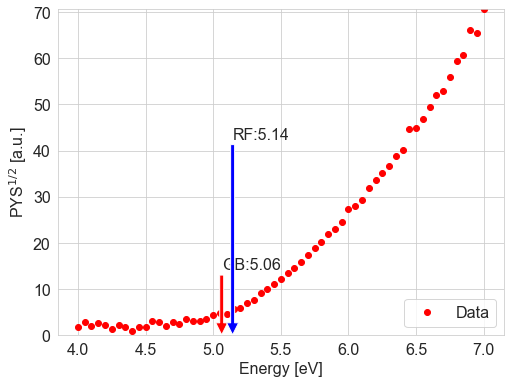

In [6]:
# データと予測結果の図示
prd.plot()

### Fittingによる予測

In [7]:
fprd =  fpl.SPYSFit()

In [8]:
fprd.fit(xx, yy, para= [4.8,300,1,1])

{'abs_fit': array([ 0.90777292,  0.90777292,  0.90777292,  0.90777292,  0.90777292,
         0.90777292,  0.90777292,  0.90777292,  0.90777292,  0.90777292,
         0.90777292,  0.90777293,  0.90777296,  0.9077731 ,  0.90777366,
         0.90777608,  0.90778632,  0.90782978,  0.90801423,  0.90879656,
         0.91210747,  0.92599194,  0.98213669,  1.18304113,  1.72269947,
         2.73180203,  4.09262701,  5.64364671,  7.28641107,  8.97534068,
        10.68952135, 12.41869415, 14.15740673, 15.90253867, 17.65218798,
        19.40513314, 21.16055518, 22.91788496, 24.67671491, 26.43674562,
        28.19775224, 29.95956269, 31.72204302, 33.48508748, 35.2486114 ,
        37.01254625, 38.77683596, 40.54143419, 42.30630234, 44.07140799,
        45.83672369, 47.60222607, 49.36789512, 51.13371356, 52.89966643,
        54.6657407 , 56.43192498, 58.19820926, 59.96458468, 61.73104344,
        63.49757857]),
 'abs_para': array([  5.20536201, 401.39040875,   2.99107767,   0.82405168]),
 'abs_r2': 0

Loss function: MAE


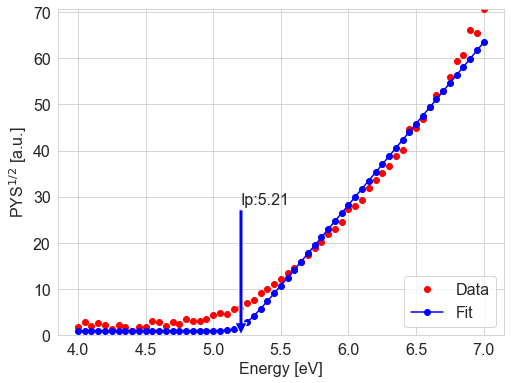

---

Loss function: RMSE


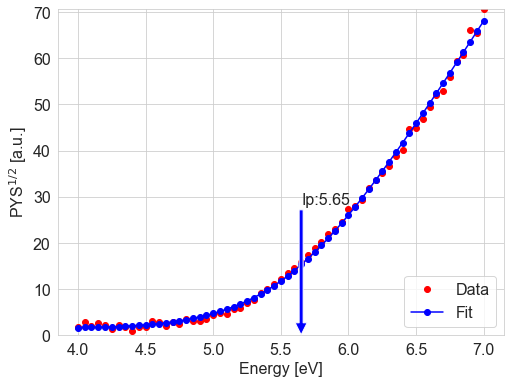

---------END---------


In [9]:
fprd.plot()

In [ ]:
# fprd.res_plot()